# Predicting House Sale Prices with Linear Regression
---
In this project, we'll build a Linear Regression model and exploring ways to improve it. We will work with housing data for the city of Ames, Iowa, United States from 2006 to 2010. Read more about why the data was collected [here](https://www.tandfonline.com/doi/abs/10.1080/10691898.2011.11889627). Read about the different columns in the data [here](https://s3.amazonaws.com/dq-content/307/data_description.txt).

## Import And Explore The Dataset

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Lasso # Linear Model trained with L1 prior as regularizer (aka the Lasso)
from sklearn.linear_model import Ridge # Linear least squares with l2 regularization.
from sklearn.model_selection import train_test_split
from sklearn.decomposition import PCA
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import f_regression
from sklearn.preprocessing import OneHotEncoder
from sklearn.metrics import mean_squared_error
%matplotlib inline

In [2]:
ames_housing = pd.read_csv('AmesHousing.tsv', sep = '\t')

In [3]:
pd.options.display.max_columns = 82
ames_housing.head()

,Order,PID,MS SubClass,MS Zoning,Lot Frontage,Lot Area,Street,Alley,Lot Shape,Land Contour,Utilities,Lot Config,Land Slope,Neighborhood,Condition 1,Condition 2,Bldg Type,House Style,Overall Qual,Overall Cond,Year Built,Year Remod/Add,Roof Style,Roof Matl,Exterior 1st,Exterior 2nd,Mas Vnr Type,Mas Vnr Area,Exter Qual,Exter Cond,Foundation,Bsmt Qual,Bsmt Cond,Bsmt Exposure,BsmtFin Type 1,BsmtFin SF 1,BsmtFin Type 2,BsmtFin SF 2,Bsmt Unf SF,Total Bsmt SF,Heating,Heating QC,Central Air,Electrical,1st Flr SF,2nd Flr SF,Low Qual Fin SF,Gr Liv Area,Bsmt Full Bath,Bsmt Half Bath,Full Bath,Half Bath,Bedroom AbvGr,Kitchen AbvGr,Kitchen Qual,TotRms AbvGrd,Functional,Fireplaces,Fireplace Qu,Garage Type,Garage Yr Blt,Garage Finish,Garage Cars,Garage Area,Garage Qual,Garage Cond,Paved Drive,Wood Deck SF,Open Porch SF,Enclosed Porch,3Ssn Porch,Screen Porch,Pool Area,Pool QC,Fence,Misc Feature,Misc Val,Mo Sold,Yr Sold,Sale Type,Sale Condition,SalePrice
0,1,526301100,20,RL,141.0,31770,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,NAmes,Norm,Norm,1Fam,1Story,6,5,1960,1960,Hip,CompShg,BrkFace,Plywood,Stone,112.0,TA,TA,CBlock,TA,Gd,Gd,BLQ,639.0,Unf,0.0,441.0,1080.0,GasA,Fa,Y,SBrkr,1656,0,0,1656,1.0,0.0,1,0,3,1,TA,7,Typ,2,Gd,Attchd,1960.0,Fin,2.0,528.0,TA,TA,P,210,62,0,0,0,0,NaN,NaN,NaN,0,5,2010,WD,Normal,215000
1,2,526350040,20,RH,80.0,11622,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,NAmes,Feedr,Norm,1Fam,1Story,5,6,1961,1961,Gable,CompShg,VinylSd,VinylSd,None,0.0,TA,TA,CBlock,TA,TA,No,Rec,468.0,LwQ,144.0,270.0,882.0,GasA,TA,Y,SBrkr,896,0,0,896,0.0,0.0,1,0,2,1,TA,5,Typ,0,NaN,Attchd,1961.0,Unf,1.0,730.0,TA,TA,Y,140,0,0,0,120,0,NaN,MnPrv,NaN,0,6,2010,WD,Normal,105000
2,3,526351010,20,RL,81.0,14267,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,NAmes,Norm,Norm,1Fam,1Story,6,6,1958,1958,Hip,CompShg,Wd Sdng,Wd Sdng,BrkFace,108.0,TA,TA,CBlock,TA,TA,No,ALQ,923.0,Unf,0.0,406.0,1329.0,GasA,TA,Y,SBrkr,1329,0,0,1329,0.0,0.0,1,1,3,1,Gd,6,Typ,0,NaN,Attchd,1958.0,Unf,1.0,312.0,TA,TA,Y,393,36,0,0,0,0,NaN,NaN,Gar2,12500,6,2010,WD,Normal,172000
3,4,526353030,20,RL,93.0,11160,Pave,NaN,Reg,Lvl,AllPub,Corner,Gtl,NAmes,Norm,Norm,1Fam,1Story,7,5,1968,1968,Hip,CompShg,BrkFace,BrkFace,None,0.0,Gd,TA,CBlock,TA,TA,No,ALQ,1065.0,Unf,0.0,1045.0,2110.0,GasA,Ex,Y,SBrkr,2110,0,0,2110,1.0,0.0,2,1,3,1,Ex,8,Typ,2,TA,Attchd,1968.0,Fin,2.0,522.0,TA,TA,Y,0,0,0,0,0,0,NaN,NaN,NaN,0,4,2010,WD,Normal,244000
4,5,527105010,60,RL,74.0,13830,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,Gilbert,Norm,Norm,1Fam,2Story,5,5,1997,1998,Gable,CompShg,VinylSd,VinylSd,None,0.0,TA,TA,PConc,Gd,TA,No,GLQ,791.0,Unf,0.0,137.0,928.0,GasA,Gd,Y,SBrkr,928,701,0,1629,0.0,0.0,2,1,3,1,TA,6,Typ,1,TA,Attchd,1997.0,Fin,2.0,482.0,TA,TA,Y,212,34,0,0,0,0,NaN,MnPrv,NaN,0,3,2010,WD,Normal,189900


In [4]:
ames_housing.describe()

,Order,PID,MS SubClass,Lot Frontage,Lot Area,Overall Qual,Overall Cond,Year Built,Year Remod/Add,Mas Vnr Area,BsmtFin SF 1,BsmtFin SF 2,Bsmt Unf SF,Total Bsmt SF,1st Flr SF,2nd Flr SF,Low Qual Fin SF,Gr Liv Area,Bsmt Full Bath,Bsmt Half Bath,Full Bath,Half Bath,Bedroom AbvGr,Kitchen AbvGr,TotRms AbvGrd,Fireplaces,Garage Yr Blt,Garage Cars,Garage Area,Wood Deck SF,Open Porch SF,Enclosed Porch,3Ssn Porch,Screen Porch,Pool Area,Misc Val,Mo Sold,Yr Sold,SalePrice
count,2930.00000,2.930000e+03,2930.000000,2440.000000,2930.000000,2930.000000,2930.000000,2930.000000,2930.000000,2907.000000,2929.000000,2929.000000,2929.000000,2929.000000,2930.000000,2930.000000,2930.000000,2930.000000,2928.000000,2928.000000,2930.000000,2930.000000,2930.000000,2930.000000,2930.000000,2930.000000,2771.000000,2929.000000,2929.000000,2930.000000,2930.000000,2930.000000,2930.000000,2930.000000,2930.000000,2930.000000,2930.000000,2930.000000,2930.000000
mean,1465.50000,7.144645e+08,57.387372,69.224590,10147.921843,6.094881,5.563140,1971.356314,1984.266553,101.896801,442.629566,49.722431,559.262547,1051.614544,1159.557679,335.455973,4.676792,1499.690444,0.431352,0.061134,1.566553,0.379522,2.854266,1.044369,6.443003,0.599317,1978.132443,1.766815,472.819734,93.751877,47.533447,23.011604,2.592491,16.002048,2.243345,50.635154,6.216041,2007.790444,180796.060068
std,845.96247,1.887308e+08,42.638025,23.365335,7880.017759,1.411026,1.111537,30.245361,20.860286,179.112611,455.590839,169.168476,439.494153,440.615067,391.890885,428.395715,46.310510,505.508887,0.524820,0.245254,0.552941,0.502629,0.827731,0.214076,1.572964,0.647921,25.528411,0.760566,215.046549,126.361562,67.483400,64.139059,25.141331,56.087370,35.597181,566.344288,2.714492,1.316613,79886.692357
min,1.00000,5.263011e+08,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,0.000000,0.000000,0.000000,334.000000,0.000000,0.000000,334.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000,0.000000,1895.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,12789.000000
25%,733.25000,5.284770e+08,20.000000,58.000000,7440.250000,5.000000,5.000000,1954.000000,1965.000000,0.000000,0.000000,0.000000,219.000000,793.000000,876.250000,0.000000,0.000000,1126.000000,0.000000,0.000000,1.000000,0.000000,2.000000,1.000000,5.000000,0.000000,1960.000000,1.000000,320.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,4.000000,2007.000000,129500.000000
50%,1465.50000,5.354536e+08,50.000000,68.000000,9436.500000,6.000000,5.000000,1973.000000,1993.000000,0.000000,370.000000,0.000000,466.000000,990.000000,1084.000000,0.000000,0.000000,1442.000000,0.000000,0.000000,2.000000,0.000000,3.000000,1.000000,6.000000,1.000000,1979.000000,2.000000,480.000000,0.000000,27.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,160000.000000
75%,2197.75000,9.071811e+08,70.000000,80.000000,11555.250000,7.000000,6.000000,2001.000000,2004.000000,164.000000,734.000000,0.000000,802.000000,1302.000000,1384.000000,703.750000,0.000000,1742.750000,1.000000,0.000000,2.000000,1.000000,3.000000,1.000000,7.000000,1.000000,2002.000000,2.000000,576.000000,168.000000,70.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,213500.000000
max,2930.00000,1.007100e+09,190.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,1526.000000,2336.000000,6110.000000,5095.000000,2065.000000,1064.000000,5642.000000,3.000000,2.000000,4.000000,2.000000,8.000000,3.000000,15.000000,4.000000,2207.000000,5.000000,1488.000000,1424.000000,742.000000,1012.000000,508.000000,576.000000,800.000000,17000.000000,12.000000,2010.000000,755000.000000


In [5]:
# Check out numerical columns 
numerical_cols = ames_housing.select_dtypes(np.number)
numerical_cols.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2930 entries, 0 to 2929
Data columns (total 39 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Order            2930 non-null   int64  
 1   PID              2930 non-null   int64  
 2   MS SubClass      2930 non-null   int64  
 3   Lot Frontage     2440 non-null   float64
 4   Lot Area         2930 non-null   int64  
 5   Overall Qual     2930 non-null   int64  
 6   Overall Cond     2930 non-null   int64  
 7   Year Built       2930 non-null   int64  
 8   Year Remod/Add   2930 non-null   int64  
 9   Mas Vnr Area     2907 non-null   float64
 10  BsmtFin SF 1     2929 non-null   float64
 11  BsmtFin SF 2     2929 non-null   float64
 12  Bsmt Unf SF      2929 non-null   float64
 13  Total Bsmt SF    2929 non-null   float64
 14  1st Flr SF       2930 non-null   int64  
 15  2nd Flr SF       2930 non-null   int64  
 16  Low Qual Fin SF  2930 non-null   int64  
 17  Gr Liv Area   

In [6]:
# Check out non-numerical columns 
non_numerical_cols = ames_housing.select_dtypes(exclude = np.number)
non_numerical_cols.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2930 entries, 0 to 2929
Data columns (total 43 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   MS Zoning       2930 non-null   object
 1   Street          2930 non-null   object
 2   Alley           198 non-null    object
 3   Lot Shape       2930 non-null   object
 4   Land Contour    2930 non-null   object
 5   Utilities       2930 non-null   object
 6   Lot Config      2930 non-null   object
 7   Land Slope      2930 non-null   object
 8   Neighborhood    2930 non-null   object
 9   Condition 1     2930 non-null   object
 10  Condition 2     2930 non-null   object
 11  Bldg Type       2930 non-null   object
 12  House Style     2930 non-null   object
 13  Roof Style      2930 non-null   object
 14  Roof Matl       2930 non-null   object
 15  Exterior 1st    2930 non-null   object
 16  Exterior 2nd    2930 non-null   object
 17  Mas Vnr Type    2907 non-null   object
 18  Exter Qu

In [7]:
# Check values in each non_numerical_cols
for col in non_numerical_cols.columns:
    print(non_numerical_cols[col].value_counts(), 
          '\n',
          '*'*10)

RL         2273
RM          462
FV          139
RH           27
C (all)      25
A (agr)       2
I (all)       2
Name: MS Zoning, dtype: int64 
 **********
Pave    2918
Grvl      12
Name: Street, dtype: int64 
 **********
Grvl    120
Pave     78
Name: Alley, dtype: int64 
 **********
Reg    1859
IR1     979
IR2      76
IR3      16
Name: Lot Shape, dtype: int64 
 **********
Lvl    2633
HLS     120
Bnk     117
Low      60
Name: Land Contour, dtype: int64 
 **********
AllPub    2927
NoSewr       2
NoSeWa       1
Name: Utilities, dtype: int64 
 **********
Inside     2140
Corner      511
CulDSac     180
FR2          85
FR3          14
Name: Lot Config, dtype: int64 
 **********
Gtl    2789
Mod     125
Sev      16
Name: Land Slope, dtype: int64 
 **********
NAmes      443
CollgCr    267
OldTown    239
Edwards    194
Somerst    182
NridgHt    166
Gilbert    165
Sawyer     151
NWAmes     131
SawyerW    125
Mitchel    114
BrkSide    108
Crawfor    103
IDOTRR      93
Timber      72
NoRidge     71

(12800.0, 755000.0)

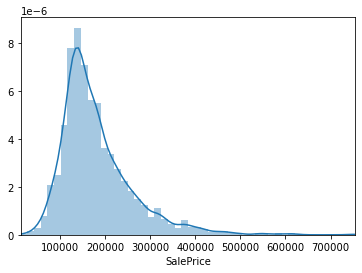

In [8]:
# Visualize our target column SalePrice
sns.distplot(ames_housing.SalePrice)
plt.xlim(12800, 755000) # xlim based on minimum & maximum SalePrice

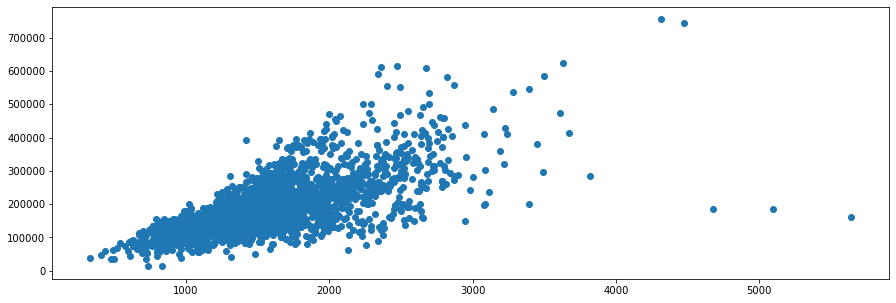

In [9]:
# Let's pick a random numerical column and plot a scatter plot with SalePrice
fig = plt.figure(figsize = (15,5))
plt.scatter(ames_housing['Gr Liv Area'], ames_housing.SalePrice)

**After a quick look at the dataset, we found that:**
* In numerical columns, there are columns of which values are obviously not directly related to the sale price. We should drop these columns: `Order`, `PID`.
* There are missing values in a few numerical columns. For the 8 columns that only have one or two missing values, we can just drop the rows. For the rest numerical columns with missing values, after checking, we can inpute the columns with their mean.   
* There are a few non-numerical columns contain a lot of null values like `Pool QC`. Considering the large amount of missing data, we should just drop those columns. We will arbitrarily set the cut-off of at 25%.
* From the frequency table of non-numerical columns, we can tell all of them are categorical, and that's what we will transform them into. 

## Data Cleaning

Let's first drop the columns that are not relevant to our target column

In [10]:
features = ames_housing.drop(['Order', 'PID'], axis = 1)

In [11]:
# Function to clean & transform features 
def transform_features(df):
    data = df.copy()
    
    # Drop_cols & drop columns with more than 25% null values
    null_check = data.isnull().sum()
    drop_cols = null_check[null_check>len(data)*0.25].index
    data.drop(drop_cols, axis = 1, inplace = True)
    
    # Fill in missing values in non_numerical values with 'missing'
    non_numerical_cols = data.copy().select_dtypes(exclude = np.number)
    non_numerical_cols.fillna('missing', inplace = True)
    
    # Convert all non-numerical columns to categorical 
    for col in non_numerical_cols.columns:
        non_numerical_cols[col] = non_numerical_cols[col].astype('category')
        
    # Inpute numerical columns that has more than 2 missing values
    numerical_cols = data.copy().select_dtypes(np.number)
    numerical_null_check = numerical_cols.isnull().sum()
    inpute_cols = numerical_null_check[numerical_null_check>2].index
    numerical_cols[inpute_cols] = numerical_cols[inpute_cols].fillna(numerical_cols[inpute_cols].mean())
    
    # Concatenate numerical and non-numerical columns 
    data = pd.concat([numerical_cols, non_numerical_cols], axis = 1)
    print(len(data)) 
    
    # Remove remaining rows with missing values 
    non_null_data = data.dropna()
    
    return non_null_data 

In [12]:
non_null_data = transform_features(features).reset_index()
non_null_data.info()

2930
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2927 entries, 0 to 2926
Data columns (total 76 columns):
 #   Column           Non-Null Count  Dtype   
---  ------           --------------  -----   
 0   index            2927 non-null   int64   
 1   MS SubClass      2927 non-null   int64   
 2   Lot Frontage     2927 non-null   float64 
 3   Lot Area         2927 non-null   int64   
 4   Overall Qual     2927 non-null   int64   
 5   Overall Cond     2927 non-null   int64   
 6   Year Built       2927 non-null   int64   
 7   Year Remod/Add   2927 non-null   int64   
 8   Mas Vnr Area     2927 non-null   float64 
 9   BsmtFin SF 1     2927 non-null   float64 
 10  BsmtFin SF 2     2927 non-null   float64 
 11  Bsmt Unf SF      2927 non-null   float64 
 12  Total Bsmt SF    2927 non-null   float64 
 13  1st Flr SF       2927 non-null   int64   
 14  2nd Flr SF       2927 non-null   int64   
 15  Low Qual Fin SF  2927 non-null   int64   
 16  Gr Liv Area      2927 non-null   int6

In [13]:
non_null_data.drop('index', axis = 1, inplace = True)

In [14]:
# Transform column names to snake_casing
non_null_data.columns = non_null_data.columns.str.lower().str.replace('\s', '_')

In [15]:
non_null_data.select_dtypes(np.number).describe()

,ms_subclass,lot_frontage,lot_area,overall_qual,overall_cond,year_built,year_remod/add,mas_vnr_area,bsmtfin_sf_1,bsmtfin_sf_2,bsmt_unf_sf,total_bsmt_sf,1st_flr_sf,2nd_flr_sf,low_qual_fin_sf,gr_liv_area,bsmt_full_bath,bsmt_half_bath,full_bath,half_bath,bedroom_abvgr,kitchen_abvgr,totrms_abvgrd,fireplaces,garage_yr_blt,garage_cars,garage_area,wood_deck_sf,open_porch_sf,enclosed_porch,3ssn_porch,screen_porch,pool_area,misc_val,mo_sold,yr_sold,saleprice
count,2927.000000,2927.000000,2927.000000,2927.000000,2927.000000,2927.000000,2927.000000,2927.000000,2927.000000,2927.000000,2927.000000,2927.000000,2927.000000,2927.000000,2927.000000,2927.000000,2927.000000,2927.000000,2927.000000,2927.000000,2927.000000,2927.000000,2927.000000,2927.000000,2927.000000,2927.000000,2927.000000,2927.000000,2927.000000,2927.000000,2927.000000,2927.000000,2927.000000,2927.000000,2927.000000,2927.000000,2927.000000
mean,57.408609,69.202613,10137.138367,6.096344,5.562009,1971.385719,1984.269218,102.001239,442.744790,49.756406,559.538435,1052.039631,1158.813119,335.497096,4.681585,1498.991800,0.431500,0.061155,1.566109,0.379570,2.853775,1.044414,6.442433,0.599248,1978.149958,1.766997,472.833960,93.788521,47.455073,22.962761,2.595149,16.018449,2.245644,50.687052,6.217629,2007.790571,180805.550735
std,42.648035,21.299187,7854.136212,1.410927,1.111442,30.243145,20.858455,178.469567,455.668872,169.221285,439.498694,440.322069,388.942762,428.404651,46.334003,503.785033,0.524849,0.245293,0.552431,0.502658,0.827049,0.214181,1.570844,0.647546,24.828936,0.760682,215.072336,126.393850,67.239479,64.073909,25.154079,56.113774,35.615352,566.632226,2.714885,1.317195,79880.475356
min,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,0.000000,0.000000,0.000000,334.000000,0.000000,0.000000,334.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000,0.000000,1895.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,12789.000000
25%,20.000000,60.000000,7440.500000,5.000000,5.000000,1954.000000,1965.000000,0.000000,0.000000,0.000000,219.000000,793.000000,876.000000,0.000000,0.000000,1126.000000,0.000000,0.000000,1.000000,0.000000,2.000000,1.000000,5.000000,0.000000,1962.000000,1.000000,320.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,4.000000,2007.000000,129500.000000
50%,50.000000,69.224590,9439.000000,6.000000,5.000000,1973.000000,1993.000000,0.000000,370.000000,0.000000,466.000000,990.000000,1084.000000,0.000000,0.000000,1442.000000,0.000000,0.000000,2.000000,0.000000,3.000000,1.000000,6.000000,1.000000,1978.132443,2.000000,480.000000,0.000000,27.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,160000.000000
75%,70.000000,78.000000,11554.500000,7.000000,6.000000,2001.000000,2004.000000,163.000000,734.500000,0.000000,802.500000,1302.000000,1384.000000,703.500000,0.000000,1742.000000,1.000000,0.000000,2.000000,1.000000,3.000000,1.000000,7.000000,1.000000,2001.000000,2.000000,576.000000,168.000000,70.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,213500.000000
max,190.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,1526.000000,2336.000000,6110.000000,5095.000000,2065.000000,1064.000000,5642.000000,3.000000,2.000000,4.000000,2.000000,8.000000,3.000000,15.000000,4.000000,2207.000000,5.000000,1488.000000,1424.000000,742.000000,1012.000000,508.000000,576.000000,800.000000,17000.000000,12.000000,2010.000000,755000.000000


### Feature Selection

[Text(0.5, 0, 'ms_subclass'),
 Text(1.5, 0, 'lot_frontage'),
 Text(2.5, 0, 'lot_area'),
 Text(3.5, 0, 'overall_qual'),
 Text(4.5, 0, 'overall_cond'),
 Text(5.5, 0, 'year_built'),
 Text(6.5, 0, 'year_remod/add'),
 Text(7.5, 0, 'mas_vnr_area'),
 Text(8.5, 0, 'bsmtfin_sf_1'),
 Text(9.5, 0, 'bsmtfin_sf_2'),
 Text(10.5, 0, 'bsmt_unf_sf'),
 Text(11.5, 0, 'total_bsmt_sf'),
 Text(12.5, 0, '1st_flr_sf'),
 Text(13.5, 0, '2nd_flr_sf'),
 Text(14.5, 0, 'low_qual_fin_sf'),
 Text(15.5, 0, 'gr_liv_area'),
 Text(16.5, 0, 'bsmt_full_bath'),
 Text(17.5, 0, 'bsmt_half_bath'),
 Text(18.5, 0, 'full_bath'),
 Text(19.5, 0, 'half_bath'),
 Text(20.5, 0, 'bedroom_abvgr'),
 Text(21.5, 0, 'kitchen_abvgr'),
 Text(22.5, 0, 'totrms_abvgrd'),
 Text(23.5, 0, 'fireplaces'),
 Text(24.5, 0, 'garage_yr_blt'),
 Text(25.5, 0, 'garage_cars'),
 Text(26.5, 0, 'garage_area'),
 Text(27.5, 0, 'wood_deck_sf'),
 Text(28.5, 0, 'open_porch_sf'),
 Text(29.5, 0, 'enclosed_porch'),
 Text(30.5, 0, '3ssn_porch'),
 Text(31.5, 0, 'screen_por

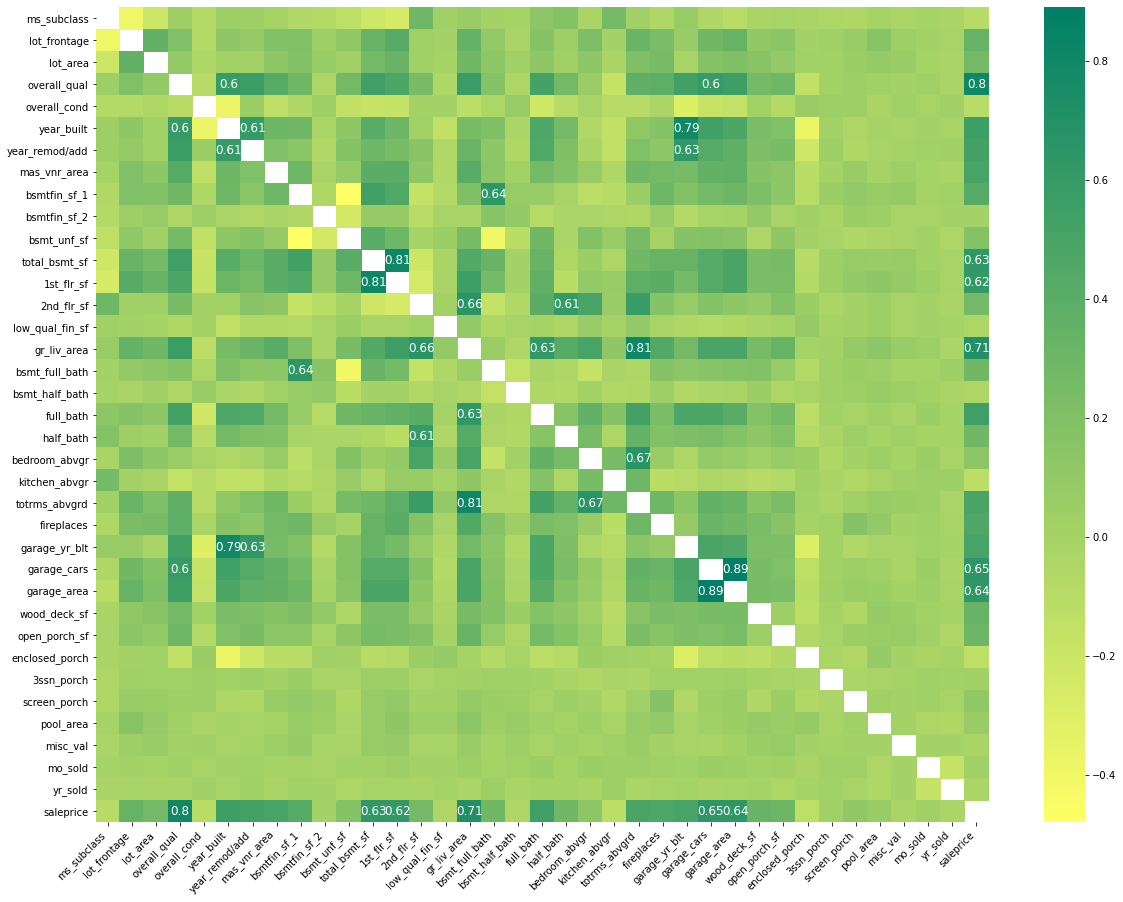

In [16]:
# Generate a heat map based on column correlations
feature_corr = round(non_null_data.corr() ,2)

# Create a mask for self-referencial correlations 
mask = feature_corr == 1

# Create labels for annotation only show values of strong correlations
labels = feature_corr.copy()
labels[(abs(labels)<0.6)] = ''


# Plot heatmap
fig = plt.figure(figsize = (20,15))
heat_map = sns.heatmap(feature_corr, annot = labels, mask = mask, fmt = '', annot_kws={'fontsize':12}, cmap = 'summer_r')
heat_map.set_xticklabels(heat_map.get_xticklabels(), rotation = 45, horizontalalignment='right')

**From the heatmap, we can tell that:**
* Strong correlations (coef bigger than 0.6) with saleprice are all positive.
* Columns `overall_qual`, `total_bsmt_sf`, `1st_flr_sf`, `gr_liv_area`, `garage_cars`, `garage_area` have strong correlations with our target column `saleprice`.
* Between feature columns, there are strong correlations too. For example `overall_qual` has a strong correlation with `year_built`, and surprisingly, `garage_cars`.

Let's create some scatter plot with higher correlations to see if there is linearity to it.

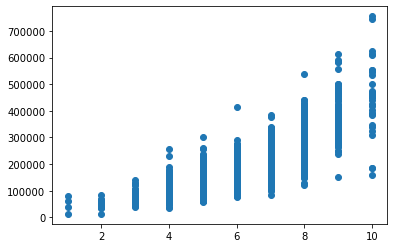

In [17]:
plt.scatter(non_null_data.overall_qual, non_null_data.saleprice)

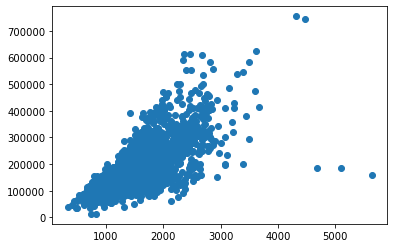

In [18]:
plt.scatter(non_null_data.gr_liv_area, non_null_data.saleprice)

* From the scatter plots above, we can definitely see some linearity in the correlation between features that correlate strongly with sale price. We are going to use f_regression from sklearn to perform feature selection on numerical features. 

### Feature selection using  PCA

In [19]:
# Select features using PCA 
def select_features_pca(df, target, feature_num):
    numerical_features = df.select_dtypes(np.number).drop(target, axis = 1)
    categorical_features = df.select_dtypes('category')
    

    # Numerical feature selection
#     test = SelectKBest(score_func=f_regression, k=feature_num)
#     top_features = test.fit_transform(numerical_features, non_null_data.saleprice)
#     top_numerical_features = pd.DataFrame(top_features)
    
    # Get dummies for categorical features 
    categorical_features = pd.get_dummies(categorical_features)
    
    # Concatenate numerical & categorical features
    all_features = pd.concat([numerical_features, categorical_features], axis = 1)
    
    # Fit pca to features
    pca = PCA(n_components=feature_num, random_state=1)
    features = pca.fit_transform(all_features)
    
    # Concatenate numerical & categorical features
#     features = pd.concat([top_numerical_features, categorical_features], axis = 1, copy = False )

    return features

In [20]:
# Test select_features_pca function
selected_features = select_features_pca(non_null_data, 'saleprice', 10)
selected_features.shape

(2927, 10)

Because it's not recommended to perform PCA on categorical features, and because we have both numerical and categorical features, we will try to do feature selection separately next.

### f_regression on numerical features and OneHotEncoder on categorical features

In [21]:
# # Write our own function to pick features
def select_features_by_type(df, target, numerical_num):
    # Seperate numerical features and categorical features
    numerical_features = df.drop(target, axis = 1).select_dtypes(np.number)
    categorical_features = df.select_dtypes('category')
    
    # Select k best numerical features
    kbest = SelectKBest(f_regression, numerical_num)
    selected_num = kbest.fit_transform(numerical_features, df[target])
    
    # Transform categorical columns with get_dummies
    enc = OneHotEncoder()
    trans_cat = enc.fit_transform(categorical_features).toarray()
    
#     Concatenate numerical & categorical features
    features = np.concatenate((selected_num, trans_cat), axis = 1)
    
    return features
    

In [22]:
# Test select_features_by_type 
select_features = select_features_by_type(non_null_data, 'saleprice', 5)
select_features.shape

C:\Users\Roman\anaconda3\lib\site-packages\sklearn\utils\validation.py:68: FutureWarning: Pass k=5 as keyword args. From version 0.25 passing these as positional arguments will result in an error
  warnings.warn("Pass {} as keyword args. From version 0.25 "


(2927, 264)

## Unregularized Linear Regression
---
In this section, we will use f_regression to pick our numerical features to test on, using Linear Regression model without regularization.

### Model using PCA as feature selection

In [23]:
# Function to train & test
def train_and_test(df, target, feature_num, training_size = None, feature_selection = None, test = False):
    
    if feature_selection == 'pca':
        X = select_features_pca(df, target, feature_num)
    elif feature_selection == 'type':
        X = select_features_by_type(df, target, feature_num)
    
    y = df[target]
    
    # First split data into train, test
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1)

    # Split train data into train, val
    X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.25, random_state=1) 
    
    lr = LinearRegression(normalize=True)
    
     # Train model with small sample size for plotting the learning curve
    if training_size:
        X_train_sm = X_train[:training_size]
        y_train_sm = y_train[:training_size]
        X_val_sm = X_val[:training_size]
        y_val_sm = y_val[:training_size]
        lr.fit(X_train_sm, y_train_sm)
        pred_train_sm = lr.predict(X_train_sm)
        mse_train_sm = mean_squared_error(y_train_sm, pred_train_sm) 
        pred_val_sm = lr.predict(X_val_sm) 
        mse_val_sm = mean_squared_error(y_val_sm, pred_val_sm)
        return mse_train_sm, mse_val_sm
    
    if test:
        print('Training model with {} features'.format(feature_num))
        lr.fit(X_train, y_train)
        pred_train = lr.predict(X_train)
        rmse_train = mean_squared_error(y_train, pred_train, squared = False) 
        pred_test = lr.predict(X_test) 
        rmse_test = mean_squared_error(y_test, pred_test, squared = False)
        print('Model has a training rmse of {}, and test rmse of {}.'.format(rmse_train, rmse_test))
        print('*'*20)
        return rmse_test

    
    # Train model
    print('Training model with {} features'.format(feature_num))
    lr.fit(X_train, y_train)
    pred_train = lr.predict(X_train)
    rmse_train = mean_squared_error(y_train, pred_train, squared = False) 
    pred_val = lr.predict(X_val) 
    rmse_val = mean_squared_error(y_val, pred_val, squared = False)
    print('Model has a training rmse of {}, and cross_validation rmse of {}.'.format(rmse_train, rmse_val))
    print('*'*20)
    
    return rmse_train, rmse_val
   

In [24]:
# Train and test on different number of numerical features
rmses_train = {}
rmses_val = {}

for i in range(30, 100):
    print('Ver.{}:'.format(i-9))
    rmse_train, rmse_val = train_and_test(df = non_null_data, 
                                          target = 'saleprice', 
                                          feature_num = i, 
                                          feature_selection='pca')
    rmses_train['Model with {} features'.format(i)] = rmse_train
    rmses_val['Model with {} features'.format(i)]  = rmse_val

Ver.21:
Training model with 30 features
Model has a training rmse of 29264.315862340238, and cross_validation rmse of 26513.911458850966.
********************
Ver.22:
Training model with 31 features
Model has a training rmse of 28935.46759603898, and cross_validation rmse of 26561.086283456167.
********************
Ver.23:
Training model with 32 features
Model has a training rmse of 28929.2327406428, and cross_validation rmse of 26549.236235926983.
********************
Ver.24:
Training model with 33 features
Model has a training rmse of 28914.317996221038, and cross_validation rmse of 26569.847704436488.
********************
Ver.25:
Training model with 34 features
Model has a training rmse of 28796.53074277462, and cross_validation rmse of 26487.752023101122.
********************
Ver.26:
Training model with 35 features
Model has a training rmse of 28873.310962599382, and cross_validation rmse of 26568.01700248483.
********************
Ver.27:
Training model with 36 features
Model has a

Training model with 82 features
Model has a training rmse of 26041.239050720164, and cross_validation rmse of 25654.380283571318.
********************
Ver.74:
Training model with 83 features
Model has a training rmse of 25990.327991350285, and cross_validation rmse of 25660.365624021768.
********************
Ver.75:
Training model with 84 features
Model has a training rmse of 26096.173645295195, and cross_validation rmse of 25636.150298011242.
********************
Ver.76:
Training model with 85 features
Model has a training rmse of 25845.10590519717, and cross_validation rmse of 25700.431915116533.
********************
Ver.77:
Training model with 86 features
Model has a training rmse of 25954.345582666996, and cross_validation rmse of 25635.035587473445.
********************
Ver.78:
Training model with 87 features
Model has a training rmse of 25989.71614451254, and cross_validation rmse of 25729.050717310976.
********************
Ver.79:
Training model with 88 features
Model has a trai

In [25]:
# Find the model with the lowest cross-validation rmse
def best_performance(rmses_val):
    min_val_key = min(rmses_val, key=rmses_val.get)
    print('{} has the lowest cross-validation rmse:'.format(min_val_key), str(rmses_val[min_val_key]))
    
best_performance(rmses_val)

Model with 99 features has the lowest cross-validation rmse: 25270.737784809295


In [28]:
# Get the learning curve of the model with lowest cross-validation rmse
mses_train_sm = []
mses_val_sm = []
for m in range(1, 400):
    mse_train_sm, mse_val_sm = train_and_test(df = non_null_data, 
                                              target = 'saleprice', 
                                              feature_num =99, 
                                              training_size=m,
                                             feature_selection='pca')
    mses_train_sm.append(mse_train_sm)
    mses_val_sm.append(mse_val_sm)

KeyboardInterrupt: 

Text(0.5, 1.0, 'Learning curve for unregularized linear regression')

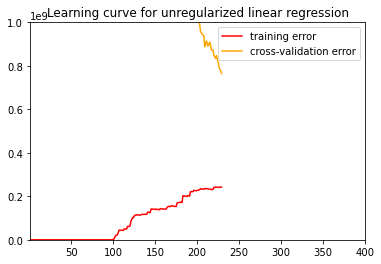

In [29]:
plt.plot(mses_train_sm, color = 'red', label = 'training error')
plt.plot(mses_val_sm, color = 'orange', label = 'cross-validation error')
plt.legend()
plt.xlim(1,400)
plt.ylim(0, 0.1e10)
plt.title('Learning curve for unregularized linear regression')

### Model using f_regression & OneHotEncoder as feature selection

In [30]:
# Train and test on different number of numerical features with type sensitive feature selection
rmses_train_bytype = {}
rmses_val_bytype = {}

# There are 37 numerical columns in total
for i in range(1, 37):
    print('Ver.{}:'.format(i))
    rmse_train, rmse_val = train_and_test(df = non_null_data, 
                                          target = 'saleprice', 
                                          feature_num = i, 
                                          feature_selection='type')
    rmses_train_bytype['Model with {} numerical features'.format(i)] = rmse_train
    rmses_val_bytype['Model with {} numerical features'.format(i)]  = rmse_val

Ver.1:
Training model with 1 features


C:\Users\Roman\anaconda3\lib\site-packages\sklearn\utils\validation.py:68: FutureWarning: Pass k=1 as keyword args. From version 0.25 passing these as positional arguments will result in an error
  warnings.warn("Pass {} as keyword args. From version 0.25 "


Model has a training rmse of 29995.450317143182, and cross_validation rmse of 2.3431345623561124e+18.
********************
Ver.2:


C:\Users\Roman\anaconda3\lib\site-packages\sklearn\utils\validation.py:68: FutureWarning: Pass k=2 as keyword args. From version 0.25 passing these as positional arguments will result in an error
  warnings.warn("Pass {} as keyword args. From version 0.25 "


Training model with 2 features
Model has a training rmse of 25099.323325176843, and cross_validation rmse of 3.045901940307835e+17.
********************
Ver.3:


C:\Users\Roman\anaconda3\lib\site-packages\sklearn\utils\validation.py:68: FutureWarning: Pass k=3 as keyword args. From version 0.25 passing these as positional arguments will result in an error
  warnings.warn("Pass {} as keyword args. From version 0.25 "


Training model with 3 features
Model has a training rmse of 25181.037686415395, and cross_validation rmse of 6.941603094883337e+17.
********************
Ver.4:


C:\Users\Roman\anaconda3\lib\site-packages\sklearn\utils\validation.py:68: FutureWarning: Pass k=4 as keyword args. From version 0.25 passing these as positional arguments will result in an error
  warnings.warn("Pass {} as keyword args. From version 0.25 "


Training model with 4 features
Model has a training rmse of 24650.22512783588, and cross_validation rmse of 2.4600303862313664e+17.
********************
Ver.5:


C:\Users\Roman\anaconda3\lib\site-packages\sklearn\utils\validation.py:68: FutureWarning: Pass k=5 as keyword args. From version 0.25 passing these as positional arguments will result in an error
  warnings.warn("Pass {} as keyword args. From version 0.25 "


Training model with 5 features
Model has a training rmse of 24816.805467848997, and cross_validation rmse of 6.103098983671012e+17.
********************
Ver.6:


C:\Users\Roman\anaconda3\lib\site-packages\sklearn\utils\validation.py:68: FutureWarning: Pass k=6 as keyword args. From version 0.25 passing these as positional arguments will result in an error
  warnings.warn("Pass {} as keyword args. From version 0.25 "


Training model with 6 features
Model has a training rmse of 24737.4569257603, and cross_validation rmse of 7.20307649311279e+17.
********************
Ver.7:


C:\Users\Roman\anaconda3\lib\site-packages\sklearn\utils\validation.py:68: FutureWarning: Pass k=7 as keyword args. From version 0.25 passing these as positional arguments will result in an error
  warnings.warn("Pass {} as keyword args. From version 0.25 "


Training model with 7 features
Model has a training rmse of 24674.90550256847, and cross_validation rmse of 6.902635483980108e+17.
********************
Ver.8:


C:\Users\Roman\anaconda3\lib\site-packages\sklearn\utils\validation.py:68: FutureWarning: Pass k=8 as keyword args. From version 0.25 passing these as positional arguments will result in an error
  warnings.warn("Pass {} as keyword args. From version 0.25 "


Training model with 8 features
Model has a training rmse of 24549.235596468992, and cross_validation rmse of 4.5388357316318266e+17.
********************
Ver.9:


C:\Users\Roman\anaconda3\lib\site-packages\sklearn\utils\validation.py:68: FutureWarning: Pass k=9 as keyword args. From version 0.25 passing these as positional arguments will result in an error
  warnings.warn("Pass {} as keyword args. From version 0.25 "


Training model with 9 features
Model has a training rmse of 24504.48559887612, and cross_validation rmse of 8.531325158990491e+16.
********************
Ver.10:


C:\Users\Roman\anaconda3\lib\site-packages\sklearn\utils\validation.py:68: FutureWarning: Pass k=10 as keyword args. From version 0.25 passing these as positional arguments will result in an error
  warnings.warn("Pass {} as keyword args. From version 0.25 "


Training model with 10 features
Model has a training rmse of 24514.875305051464, and cross_validation rmse of 3.818820175008858e+17.
********************
Ver.11:


C:\Users\Roman\anaconda3\lib\site-packages\sklearn\utils\validation.py:68: FutureWarning: Pass k=11 as keyword args. From version 0.25 passing these as positional arguments will result in an error
  warnings.warn("Pass {} as keyword args. From version 0.25 "


Training model with 11 features
Model has a training rmse of 24728.844122589235, and cross_validation rmse of 8.134344404658673e+17.
********************
Ver.12:


C:\Users\Roman\anaconda3\lib\site-packages\sklearn\utils\validation.py:68: FutureWarning: Pass k=12 as keyword args. From version 0.25 passing these as positional arguments will result in an error
  warnings.warn("Pass {} as keyword args. From version 0.25 "


Training model with 12 features
Model has a training rmse of 24284.55370416052, and cross_validation rmse of 1.1693595764155549e+17.
********************
Ver.13:


C:\Users\Roman\anaconda3\lib\site-packages\sklearn\utils\validation.py:68: FutureWarning: Pass k=13 as keyword args. From version 0.25 passing these as positional arguments will result in an error
  warnings.warn("Pass {} as keyword args. From version 0.25 "


Training model with 13 features
Model has a training rmse of 24225.13397560852, and cross_validation rmse of 1.700287912826121e+17.
********************
Ver.14:


C:\Users\Roman\anaconda3\lib\site-packages\sklearn\utils\validation.py:68: FutureWarning: Pass k=14 as keyword args. From version 0.25 passing these as positional arguments will result in an error
  warnings.warn("Pass {} as keyword args. From version 0.25 "


Training model with 14 features
Model has a training rmse of 23991.139209539633, and cross_validation rmse of 1.0838609687733196e+18.
********************
Ver.15:
Training model with 15 features


C:\Users\Roman\anaconda3\lib\site-packages\sklearn\utils\validation.py:68: FutureWarning: Pass k=15 as keyword args. From version 0.25 passing these as positional arguments will result in an error
  warnings.warn("Pass {} as keyword args. From version 0.25 "


Model has a training rmse of 23853.145893152123, and cross_validation rmse of 8.437289959218345e+17.
********************
Ver.16:


C:\Users\Roman\anaconda3\lib\site-packages\sklearn\utils\validation.py:68: FutureWarning: Pass k=16 as keyword args. From version 0.25 passing these as positional arguments will result in an error
  warnings.warn("Pass {} as keyword args. From version 0.25 "


Training model with 16 features
Model has a training rmse of 23844.227806572766, and cross_validation rmse of 2.1765993617125517e+17.
********************
Ver.17:


C:\Users\Roman\anaconda3\lib\site-packages\sklearn\utils\validation.py:68: FutureWarning: Pass k=17 as keyword args. From version 0.25 passing these as positional arguments will result in an error
  warnings.warn("Pass {} as keyword args. From version 0.25 "


Training model with 17 features
Model has a training rmse of 23809.324683260853, and cross_validation rmse of 7.779643719781139e+17.
********************
Ver.18:


C:\Users\Roman\anaconda3\lib\site-packages\sklearn\utils\validation.py:68: FutureWarning: Pass k=18 as keyword args. From version 0.25 passing these as positional arguments will result in an error
  warnings.warn("Pass {} as keyword args. From version 0.25 "


Training model with 18 features
Model has a training rmse of 23864.664963508556, and cross_validation rmse of 3.1282792999477005e+17.
********************
Ver.19:


C:\Users\Roman\anaconda3\lib\site-packages\sklearn\utils\validation.py:68: FutureWarning: Pass k=19 as keyword args. From version 0.25 passing these as positional arguments will result in an error
  warnings.warn("Pass {} as keyword args. From version 0.25 "


Training model with 19 features
Model has a training rmse of 23722.60971027633, and cross_validation rmse of 2.9860547888345536e+17.
********************
Ver.20:


C:\Users\Roman\anaconda3\lib\site-packages\sklearn\utils\validation.py:68: FutureWarning: Pass k=20 as keyword args. From version 0.25 passing these as positional arguments will result in an error
  warnings.warn("Pass {} as keyword args. From version 0.25 "


Training model with 20 features
Model has a training rmse of 23706.969866478983, and cross_validation rmse of 1.9079426483352202e+17.
********************
Ver.21:


C:\Users\Roman\anaconda3\lib\site-packages\sklearn\utils\validation.py:68: FutureWarning: Pass k=21 as keyword args. From version 0.25 passing these as positional arguments will result in an error
  warnings.warn("Pass {} as keyword args. From version 0.25 "


Training model with 21 features
Model has a training rmse of 23656.63874035654, and cross_validation rmse of 1.0016215129719311e+18.
********************
Ver.22:


C:\Users\Roman\anaconda3\lib\site-packages\sklearn\utils\validation.py:68: FutureWarning: Pass k=22 as keyword args. From version 0.25 passing these as positional arguments will result in an error
  warnings.warn("Pass {} as keyword args. From version 0.25 "


Training model with 22 features
Model has a training rmse of 23502.807164615337, and cross_validation rmse of 5.706995405171335e+17.
********************
Ver.23:


C:\Users\Roman\anaconda3\lib\site-packages\sklearn\utils\validation.py:68: FutureWarning: Pass k=23 as keyword args. From version 0.25 passing these as positional arguments will result in an error
  warnings.warn("Pass {} as keyword args. From version 0.25 "


Training model with 23 features
Model has a training rmse of 23494.047132590335, and cross_validation rmse of 4.962268211951776e+17.
********************
Ver.24:


C:\Users\Roman\anaconda3\lib\site-packages\sklearn\utils\validation.py:68: FutureWarning: Pass k=24 as keyword args. From version 0.25 passing these as positional arguments will result in an error
  warnings.warn("Pass {} as keyword args. From version 0.25 "


Training model with 24 features
Model has a training rmse of 23514.41111770685, and cross_validation rmse of 1.5462438352525827e+18.
********************
Ver.25:


C:\Users\Roman\anaconda3\lib\site-packages\sklearn\utils\validation.py:68: FutureWarning: Pass k=25 as keyword args. From version 0.25 passing these as positional arguments will result in an error
  warnings.warn("Pass {} as keyword args. From version 0.25 "


Training model with 25 features
Model has a training rmse of 23458.479723051303, and cross_validation rmse of 3.0263060232274304e+17.
********************
Ver.26:


C:\Users\Roman\anaconda3\lib\site-packages\sklearn\utils\validation.py:68: FutureWarning: Pass k=26 as keyword args. From version 0.25 passing these as positional arguments will result in an error
  warnings.warn("Pass {} as keyword args. From version 0.25 "


Training model with 26 features
Model has a training rmse of 23331.067474488715, and cross_validation rmse of 5.394600330773336e+17.
********************
Ver.27:


C:\Users\Roman\anaconda3\lib\site-packages\sklearn\utils\validation.py:68: FutureWarning: Pass k=27 as keyword args. From version 0.25 passing these as positional arguments will result in an error
  warnings.warn("Pass {} as keyword args. From version 0.25 "


Training model with 27 features
Model has a training rmse of 23013.79448096219, and cross_validation rmse of 4.194372607563285e+17.
********************
Ver.28:


C:\Users\Roman\anaconda3\lib\site-packages\sklearn\utils\validation.py:68: FutureWarning: Pass k=28 as keyword args. From version 0.25 passing these as positional arguments will result in an error
  warnings.warn("Pass {} as keyword args. From version 0.25 "


Training model with 28 features
Model has a training rmse of 22997.626797952256, and cross_validation rmse of 1.204666285691333e+17.
********************
Ver.29:


C:\Users\Roman\anaconda3\lib\site-packages\sklearn\utils\validation.py:68: FutureWarning: Pass k=29 as keyword args. From version 0.25 passing these as positional arguments will result in an error
  warnings.warn("Pass {} as keyword args. From version 0.25 "


Training model with 29 features
Model has a training rmse of 22961.150866296823, and cross_validation rmse of 3.0720540090526584e+16.
********************
Ver.30:


C:\Users\Roman\anaconda3\lib\site-packages\sklearn\utils\validation.py:68: FutureWarning: Pass k=30 as keyword args. From version 0.25 passing these as positional arguments will result in an error
  warnings.warn("Pass {} as keyword args. From version 0.25 "


Training model with 30 features
Model has a training rmse of 22961.449525143802, and cross_validation rmse of 2.683402987801268e+17.
********************
Ver.31:


C:\Users\Roman\anaconda3\lib\site-packages\sklearn\utils\validation.py:68: FutureWarning: Pass k=31 as keyword args. From version 0.25 passing these as positional arguments will result in an error
  warnings.warn("Pass {} as keyword args. From version 0.25 "


Training model with 31 features
Model has a training rmse of 22940.697552304828, and cross_validation rmse of 3.898656608113598e+16.
********************
Ver.32:


C:\Users\Roman\anaconda3\lib\site-packages\sklearn\utils\validation.py:68: FutureWarning: Pass k=32 as keyword args. From version 0.25 passing these as positional arguments will result in an error
  warnings.warn("Pass {} as keyword args. From version 0.25 "


Training model with 32 features
Model has a training rmse of 22928.21212034047, and cross_validation rmse of 1.2218052066584474e+17.
********************
Ver.33:


C:\Users\Roman\anaconda3\lib\site-packages\sklearn\utils\validation.py:68: FutureWarning: Pass k=33 as keyword args. From version 0.25 passing these as positional arguments will result in an error
  warnings.warn("Pass {} as keyword args. From version 0.25 "


Training model with 33 features
Model has a training rmse of 22920.583549934232, and cross_validation rmse of 1.4192808031601635e+17.
********************
Ver.34:


C:\Users\Roman\anaconda3\lib\site-packages\sklearn\utils\validation.py:68: FutureWarning: Pass k=34 as keyword args. From version 0.25 passing these as positional arguments will result in an error
  warnings.warn("Pass {} as keyword args. From version 0.25 "


Training model with 34 features
Model has a training rmse of 22906.913170258093, and cross_validation rmse of 3.043254197343083e+17.
********************
Ver.35:


C:\Users\Roman\anaconda3\lib\site-packages\sklearn\utils\validation.py:68: FutureWarning: Pass k=35 as keyword args. From version 0.25 passing these as positional arguments will result in an error
  warnings.warn("Pass {} as keyword args. From version 0.25 "


Training model with 35 features
Model has a training rmse of 22269.986529764617, and cross_validation rmse of 5.21579035018423e+17.
********************
Ver.36:


C:\Users\Roman\anaconda3\lib\site-packages\sklearn\utils\validation.py:68: FutureWarning: Pass k=36 as keyword args. From version 0.25 passing these as positional arguments will result in an error
  warnings.warn("Pass {} as keyword args. From version 0.25 "


Training model with 36 features
Model has a training rmse of 22296.22539581206, and cross_validation rmse of 3.095724576991579e+17.
********************


In [31]:
best_performance(rmses_val_bytype)

Model with 29 numerical features has the lowest cross-validation rmse: 3.0720540090526584e+16


In [32]:
# Get the learning curve of the model with lowest cross-validation rmse
mses_train_sm_bytype = []
mses_val_sm_bytype = []
for m in range(1, 400):
    mse_train_sm_bytype, mse_val_sm_bytype = train_and_test(df = non_null_data, 
                                              target = 'saleprice', 
                                              feature_num = 29, # Indicates number of numerical features
                                              training_size=m,
                                             feature_selection='type')
    mses_train_sm_bytype.append(mse_train_sm_bytype)
    mses_val_sm_bytype.append(mse_val_sm_bytype)

C:\Users\Roman\anaconda3\lib\site-packages\sklearn\utils\validation.py:68: FutureWarning: Pass k=29 as keyword args. From version 0.25 passing these as positional arguments will result in an error
  warnings.warn("Pass {} as keyword args. From version 0.25 "
C:\Users\Roman\anaconda3\lib\site-packages\sklearn\utils\validation.py:68: FutureWarning: Pass k=29 as keyword args. From version 0.25 passing these as positional arguments will result in an error
  warnings.warn("Pass {} as keyword args. From version 0.25 "
C:\Users\Roman\anaconda3\lib\site-packages\sklearn\utils\validation.py:68: FutureWarning: Pass k=29 as keyword args. From version 0.25 passing these as positional arguments will result in an error
  warnings.warn("Pass {} as keyword args. From version 0.25 "
C:\Users\Roman\anaconda3\lib\site-packages\sklearn\utils\validation.py:68: FutureWarning: Pass k=29 as keyword args. From version 0.25 passing these as positional arguments will result in an error
  warnings.warn("Pass {} a

C:\Users\Roman\anaconda3\lib\site-packages\sklearn\utils\validation.py:68: FutureWarning: Pass k=29 as keyword args. From version 0.25 passing these as positional arguments will result in an error
  warnings.warn("Pass {} as keyword args. From version 0.25 "
C:\Users\Roman\anaconda3\lib\site-packages\sklearn\utils\validation.py:68: FutureWarning: Pass k=29 as keyword args. From version 0.25 passing these as positional arguments will result in an error
  warnings.warn("Pass {} as keyword args. From version 0.25 "
C:\Users\Roman\anaconda3\lib\site-packages\sklearn\utils\validation.py:68: FutureWarning: Pass k=29 as keyword args. From version 0.25 passing these as positional arguments will result in an error
  warnings.warn("Pass {} as keyword args. From version 0.25 "
C:\Users\Roman\anaconda3\lib\site-packages\sklearn\utils\validation.py:68: FutureWarning: Pass k=29 as keyword args. From version 0.25 passing these as positional arguments will result in an error
  warnings.warn("Pass {} a

C:\Users\Roman\anaconda3\lib\site-packages\sklearn\utils\validation.py:68: FutureWarning: Pass k=29 as keyword args. From version 0.25 passing these as positional arguments will result in an error
  warnings.warn("Pass {} as keyword args. From version 0.25 "
C:\Users\Roman\anaconda3\lib\site-packages\sklearn\utils\validation.py:68: FutureWarning: Pass k=29 as keyword args. From version 0.25 passing these as positional arguments will result in an error
  warnings.warn("Pass {} as keyword args. From version 0.25 "
C:\Users\Roman\anaconda3\lib\site-packages\sklearn\utils\validation.py:68: FutureWarning: Pass k=29 as keyword args. From version 0.25 passing these as positional arguments will result in an error
  warnings.warn("Pass {} as keyword args. From version 0.25 "
C:\Users\Roman\anaconda3\lib\site-packages\sklearn\utils\validation.py:68: FutureWarning: Pass k=29 as keyword args. From version 0.25 passing these as positional arguments will result in an error
  warnings.warn("Pass {} a

SystemError: PyEval_EvalFrameEx returned a result with an error set

Text(0.5, 1.0, 'Learning curve for unregularized linear regression feature by type')

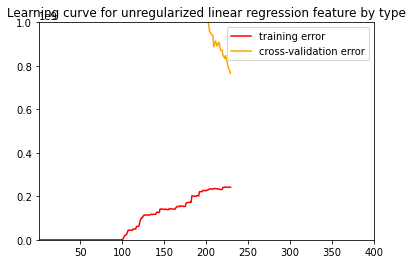

In [33]:
plt.plot(mses_train_sm, color = 'red', label = 'training error')
plt.plot(mses_val_sm, color = 'orange', label = 'cross-validation error')
plt.legend()
plt.xlim(1,400)
plt.ylim(0, 0.1e10)
plt.title('Learning curve for unregularized linear regression feature by type')

**The learning curve above -- the low training error and high cross-validation error indicates over fitting, aka high variance. Next, let's try regularizing the model with a lambda value.**

<img src="High_variance.png">

### Test unregularized model with best parameters on all models

In [ ]:
# Best pca params
train_and_test(non_null_data, 'saleprice', feature_num = 99, feature_selection = 'pca', test = True)

In [ ]:
# Best bytype params
train_and_test(non_null_data, 'saleprice', feature_num = 29, feature_selection = 'type', test = True)

Above with a low training error and really high test error is typical over fitting.

## Regularized Linear Regression
---
In this section, we will leave the feature columns be, and use Linear Regression model with l2(Ridge) regularization. <br><br>
We will compare the regularized Linear Regression with our previous unregularized Linear Regression, also, with or without feature selection

### Regularized Linear Regression without feature selection

In [ ]:
# Function to train & test with Ridge
def regularized_train_and_test(df, target, alpha, 
                               training_size = None, 
                               feature_selection = None, 
                               feature_number = None,
                               test = False):
    
    if feature_selection == 'type':
        X = select_features_by_type(df, target, feature_number)
    elif feature_selection == 'pca':
        X = select_features_pca(df, target, feature_number)
        
    else:
        # Get dummies for categorized data
        categorized_features = df.select_dtypes('category')
        categorized_features = pd.get_dummies(categorized_features)
        # Get numerical features 
        numerical_features = df.select_dtypes(np.number).drop(target, axis = 1)
        X = pd.concat([numerical_features, categorized_features], axis = 1)

    
    y = df[target]
    
    # First split data into train, test
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1)

    # Split train data into train, val
    X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.25, random_state=1) 
    
    model = Ridge(alpha = alpha)
    
    # Train model with small sample size for plotting the learning curve
    if training_size:
        X_train_sm = X_train[:training_size]
        y_train_sm = y_train[:training_size]
        X_val_sm = X_val[:training_size]
        y_val_sm = y_val[:training_size]
        model.fit(X_train_sm, y_train_sm)
        pred_train_sm = model.predict(X_train_sm)
        mse_train_sm = mean_squared_error(y_train_sm, pred_train_sm) 
        pred_val_sm = model.predict(X_val_sm) 
        mse_val_sm = mean_squared_error(y_val_sm, pred_val_sm)
        return mse_train_sm, mse_val_sm
    
    if test:
        model.fit(X_train, y_train)
        pred_train = model.predict(X_train)
        rmse_train = mean_squared_error(y_train, pred_train, squared = False) 
        pred_test = model.predict(X_test) 
        rmse_test = mean_squared_error(y_test, pred_test, squared = False)
        print('Model has a training rmse of {}, and test rmse of {}.'.format(rmse_train, rmse_test))
        return rmse_test
    
    
    # Train model
    print('Training model with regularization alpha: {}'.format(alpha))
    model.fit(X_train, y_train)
    pred_train = model.predict(X_train)
    rmse_train = mean_squared_error(y_train, pred_train, squared = False) 
    pred_val = model.predict(X_val) 
    rmse_val = mean_squared_error(y_val, pred_val, squared = False)
    print('Model has a training rmse of {}, and cross_validation rmse of {}.'.format(rmse_train, rmse_val))
    
    return rmse_train, rmse_val

In [ ]:
# Train and test on different number of alpha without any feature selection
r_rmses_train = {}
r_rmses_val = {}

for alpha in range(1,50):
    rmse_train, rmse_val = regularized_train_and_test(non_null_data, 'saleprice', alpha)
    r_rmses_train['Model with alpha: {}'.format(alpha)] = rmse_train
    r_rmses_val['Model with alpha: {}'.format(alpha)]  = rmse_val

In [ ]:
# Find the model with the lowest cross-validation rmse
best_performance(r_rmses_val)

In [ ]:
r_mses_train_sm = []
r_mses_val_sm = []

for m in range(1,300):
    r_mse_train_sm, r_mse_val_sm = regularized_train_and_test(non_null_data, 'saleprice', 22, training_size = m)
    r_mses_train_sm.append(r_mse_train_sm)
    r_mses_val_sm.append(r_mse_val_sm)    

In [ ]:
plt.plot(r_mses_train_sm, color = 'red', label = 'regularized_training error')
plt.plot(r_mses_val_sm, color = 'orange', label = 'regularized_cross-validation error')
plt.xlim(1,100)
plt.ylim(0, 0.2e10)
plt.title('Learning curve for regularized linear regression without feature seleciton')
plt.legend()

### Regularized Linear Regression with feature selection

In [ ]:
# Train and test on different number of alpha with feature selection
r_rmses_train_type = {}
r_rmses_val_type = {}

for alpha in range(1,50):
    rmse_train, rmse_val = regularized_train_and_test(non_null_data, 
                                                      'saleprice', 
                                                      alpha, 
                                                      feature_selection='type', 
                                                      feature_number=29)
    r_rmses_train_type['Model with alpha: {}'.format(alpha)] = rmse_train
    r_rmses_val_type['Model with alpha: {}'.format(alpha)]  = rmse_val

In [ ]:
best_performance(r_rmses_val_type)

In [ ]:
# Find learning curve for best performance 
r_mses_train_sm_type = []
r_mses_val_sm_type = []

for m in range(1,300):
    r_mse_train_sm, r_mse_val_sm = regularized_train_and_test(non_null_data, 
                                                              'saleprice', 
                                                              alpha = 21, 
                                                              training_size = m, 
                                                              feature_selection='type', 
                                                              numerical_number=29)
    r_mses_train_sm_type.append(r_mse_train_sm)
    r_mses_val_sm_type.append(r_mse_val_sm)    

In [ ]:
plt.plot(r_mses_train_sm_type, color = 'red', label = 'regularized_training error')
plt.plot(r_mses_val_sm_type, color = 'orange', label = 'regularized_cross-validation error')
plt.xlim(1,100)
plt.ylim(0, 0.2e10)
plt.title('Learning curve for regularized linear regression with feature selection')
plt.legend()

### Regularized Linear Regression with PCA

In [ ]:
# Train and test on different number of alpha with feature selection
r_rmses_train_pca = {}
r_rmses_val_pca = {}

for alpha in range(1,50):
    rmse_train, rmse_val = regularized_train_and_test(non_null_data, 
                                                      'saleprice', 
                                                      alpha, 
                                                      feature_selection='pca', 
                                                      feature_number = 99)
    r_rmses_train_pca['Model with alpha: {}'.format(alpha)] = rmse_train
    r_rmses_val_pca['Model with alpha: {}'.format(alpha)]  = rmse_val

In [ ]:
best_performance(r_rmses_val_pca)

In [ ]:
# Learning curve for Regularized Linear Regression with feature selection
# Find learning curve for best performance 
r_mses_train_sm_pca = []
r_mses_val_sm_pca = []

for m in range(1,300):
    r_mse_train_sm, r_mse_val_sm = regularized_train_and_test(non_null_data, 
                                                              'saleprice', 
                                                              alpha = 49, 
                                                              training_size = m, 
                                                              feature_selection='pca', 
                                                              feature_number=99)
    r_mses_train_sm_pca.append(r_mse_train_sm)
    r_mses_val_sm_pca.append(r_mse_val_sm)    

In [ ]:
plt.plot(r_mses_train_sm_pca, color = 'red', label = 'regularized_training error')
plt.plot(r_mses_val_sm_pca, color = 'orange', label = 'regularized_cross-validation error')
plt.xlim(1,100)
plt.ylim(0, 0.2e10)
plt.title('Learning curve for regularized linear regression with pca')
plt.legend()

### Test regularized model with best parameters

In [ ]:
# Best without feature selection
regularized_train_and_test(non_null_data, 
                           'saleprice', 
                            alpha = 22,
                            test = True)

In [ ]:
# Best with by type feature selection
regularized_train_and_test(non_null_data, 
                           'saleprice', 
                            alpha = 21, 
                            feature_selection = 'type', 
                            feature_number = 29,
                            test = True)

In [ ]:
# Best with pca 
regularized_train_and_test(non_null_data, 
                           'saleprice', 
                            alpha = 49, 
                            feature_selection = 'pca', 
                            feature_number = 99,
                            test = True)

# Conclusion:
***Results:***

  
|                 | no feature selection | pca | feature selection by type |
|-----------------|----------------------|-----|---------------------------|
|**unregularized**| none | **cv:** 25271 **test:** 34157 | **cv:** 3.7e15 **test:** 2.4e15 |
| **regularized** | **cv:** 24076 **test:** 33185 | **cv:** 24968 **test:** 34665| **cv:** 24293 **test:** 32342 |
    
---
***From the results above, we can conclude:***
* Regularized Linear Regression delivers better results in general.
* With a large number of features, i.e a linear regression model with a high oder polynomial function, can lead to over fitting. But with regularized Linear Regression, it can generalize and give the best performance. This refers to the last column in our results.

--- 
***Next steps:***
* Explore [column transformer](https://scikit-learn.org/stable/auto_examples/compose/plot_column_transformer_mixed_types.html) pipelines for the case of datasets that contain heterogeneous data types. 